In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Question a 

###### Here the significant values are identified using Correlation

In [2]:
car=pd.read_csv('Car_sales_details_p3.csv')
car.head()

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5
4,5,Maruti Swift VXI BSIII,2007,130000,120000,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5


In [3]:
status= pd.read_csv('sales_Status_p3.csv')
status.head()

,Sales_ID,sold
0,1,Y
1,2,Y
2,3,Y
3,4,Y
4,5,Y


In [4]:
state=pd.read_csv('State_region_mapping_p3.csv')
state.head()

,Region,State or Province
0,Central,Illinois
1,Central,Indiana
2,Central,Iowa
3,Central,Kansas
4,Central,Michigan


In [5]:
car['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [6]:
def own(x):
    if x=='First Owner':
        return 1
    elif x=='Second Owner':
        return 2
    elif x=='Third Owner':
        return 3
    elif x=='Fourth & Above Owner':
        return 4
    else:
        return 5

In [7]:
car['Owner']=car['owner'].map(own)

In [8]:
car['Owner'].head()

0    1
1    2
2    3
3    1
4    1
Name: Owner, dtype: int64

In [9]:
car['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [10]:
def fuel_val(x):
    if x=='Diesel':
        return 1
    elif x=='Petrol':
        return 2
    elif x=='LPG':
        return 3
    elif x=='CNG':
        return 4

In [11]:
car['fuel_val']= car['fuel'].map(fuel_val)

In [12]:
car['fuel_val'].head()

0    1
1    1
2    2
3    1
4    2
Name: fuel_val, dtype: int64

In [13]:
car['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [14]:
def sellertype(x):
    if x=='Individual':
        return 1
    elif x=='Dealer':
        return 2
    elif x=='Trustmark Dealer':
        return 3

In [15]:
car['sellertype']= car['seller_type'].map(sellertype)
car['sellertype'].head()

0    1
1    1
2    1
3    1
4    1
Name: sellertype, dtype: int64

In [16]:
car['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
def transmission(x):
    if x=='Manual':
        return 1
    elif x=='Automatic':
        return 2

In [18]:
car['transmission_val']= car['transmission'].map(transmission)
car['transmission_val'].head()

0    1
1    1
2    1
3    1
4    1
Name: transmission_val, dtype: int64

In [19]:
car['mileage_val']= car['mileage'].apply(lambda x : x.split(' '))
car['mileage_val']=car['mileage_val'].apply(lambda x: x[0])
car['mileage_val']=car['mileage_val'].astype('float64')
car['mileage_val'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage_val, dtype: float64

In [20]:
car['engine_val']= car['engine'].apply(lambda x : x.split(' '))
car['engine_val']=car['engine_val'].apply(lambda x: x[0])
car['engine_val']=car['engine_val'].astype('int64')
car['engine_val'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine_val, dtype: int64

In [21]:
car['mp_val']= car['max_power'].apply(lambda x : x.split(' '))
car['mp_val']=car['mp_val'].apply(lambda x: x[0])
car['mp_val']=car['mp_val'].astype('float64')
car['mp_val'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: mp_val, dtype: float64

In [22]:
car.head()

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,...,engine,max_power,seats,Owner,fuel_val,sellertype,transmission_val,mileage_val,engine_val,mp_val
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,...,1248 CC,74 bhp,5,1,1,1,1,23.40,1248,74.00
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,...,1498 CC,103.52 bhp,5,2,1,1,1,21.14,1498,103.52
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,...,1497 CC,78 bhp,5,3,2,1,1,17.70,1497,78.00
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Illinois,Chicago,Diesel,Individual,Manual,...,1396 CC,90 bhp,5,1,1,1,1,23.00,1396,90.00
4,5,Maruti Swift VXI BSIII,2007,130000,120000,New York,New York City,Petrol,Individual,Manual,...,1298 CC,88.2 bhp,5,1,2,1,1,16.10,1298,88.20


In [23]:
sellingprice= {'year':0.412302,'km_driven':-0.222158,'seats':0.041617,'Owner':-0.216514,'Mileage':-0.126280,'Engine':0.455682,'Max_power':0.749674,'Fuel':-0.201221,'Seller_type':0.321389}

In [24]:
data=car.drop(columns=['State or Province','City','fuel','seller_type','transmission','owner','mileage','engine','max_power'],axis=1)
data.head()

,Sales_ID,name,year,selling_price,km_driven,seats,Owner,fuel_val,sellertype,transmission_val,mileage_val,engine_val,mp_val
0,1,Maruti Swift Dzire VDI,2014,450000,145500,5,1,1,1,1,23.40,1248,74.00
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,5,2,1,1,1,21.14,1498,103.52
2,3,Honda City 2017-2020 EXi,2006,158000,140000,5,3,2,1,1,17.70,1497,78.00
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,5,1,1,1,1,23.00,1396,90.00
4,5,Maruti Swift VXI BSIII,2007,130000,120000,5,1,2,1,1,16.10,1298,88.20


<AxesSubplot:>

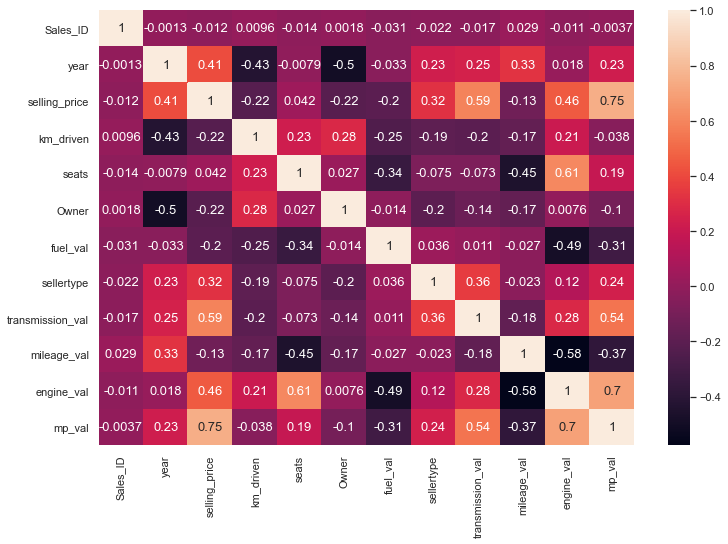

In [25]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(data=car.corr(),annot=True,annot_kws={"size": 13})

In [26]:
corr= car.corr()
corr

,Sales_ID,year,selling_price,km_driven,seats,Owner,fuel_val,sellertype,transmission_val,mileage_val,engine_val,mp_val
Sales_ID,1.000000,-0.001304,-0.012125,0.009556,-0.014154,0.001766,-0.030596,-0.022007,-0.017498,0.028627,-0.011279,-0.003717
year,-0.001304,1.000000,0.412302,-0.428548,-0.007923,-0.499703,-0.032935,0.231798,0.249002,0.328544,0.018263,0.226598
selling_price,-0.012125,0.412302,1.000000,-0.222158,0.041617,-0.216514,-0.201221,0.321389,0.590269,-0.126280,0.455682,0.749674
km_driven,0.009556,-0.428548,-0.222158,1.000000,0.227259,0.281182,-0.246821,-0.192788,-0.201186,-0.172980,0.206031,-0.038159
seats,-0.014154,-0.007923,0.041617,0.227259,1.000000,0.027390,-0.338849,-0.075284,-0.072722,-0.451700,0.611103,0.191999
Owner,0.001766,-0.499703,-0.216514,0.281182,0.027390,1.000000,-0.014162,-0.197571,-0.141350,-0.174864,0.007632,-0.104865
fuel_val,-0.030596,-0.032935,-0.201221,-0.246821,-0.338849,-0.014162,1.000000,0.036044,0.010803,-0.026830,-0.487862,-0.306224
sellertype,-0.022007,0.231798,0.321389,-0.192788,-0.075284,-0.197571,0.036044,1.000000,0.357740,-0.022672,0.120017,0.239235
transmission_val,-0.017498,0.249002,0.590269,-0.201186,-0.072722,-0.141350,0.010803,0.357740,1.000000,-0.178986,0.283206,0.541870
mileage_val,0.028627,0.328544,-0.126280,-0.172980,-0.451700,-0.174864,-0.026830,-0.022672,-0.178986,1.000000,-0.576408,-0.374621


## Significant values to evaluate Selling price

In [27]:
sellingprice= {'year':0.412302,'km_driven':-0.222158,'seats':0.041617,'Owner':-0.216514,'Mileage':-0.126280,'Engine':0.455682,'Max_power':0.749674,'Fuel':-0.201221,'Seller_type':0.321389}
dt = pd.Series(sellingprice)
dt

year           0.412302
km_driven     -0.222158
seats          0.041617
Owner         -0.216514
Mileage       -0.126280
Engine         0.455682
Max_power      0.749674
Fuel          -0.201221
Seller_type    0.321389
dtype: float64

In [34]:
'''The significant values are :
    Year
    Seller Type
    Transmission
    Engine
    Max Power
'''

'The significant values are :\n    Year\n    Seller Type\n    Transmission\n    Engine\n    Max Power\n'

# Question b

In [28]:
data=car.drop(columns=['Sales_ID', 'name','State or Province','City','fuel','seller_type','transmission','owner','mileage','engine','max_power'],axis=1)
data.head()
#data = data.iloc[:,1:-1]
#data.head()
data.columns

Index(['year', 'selling_price', 'km_driven', 'seats', 'Owner', 'fuel_val',
       'sellertype', 'transmission_val', 'mileage_val', 'engine_val',
       'mp_val'],
      dtype='object')

<Figure size 1440x1800 with 0 Axes>

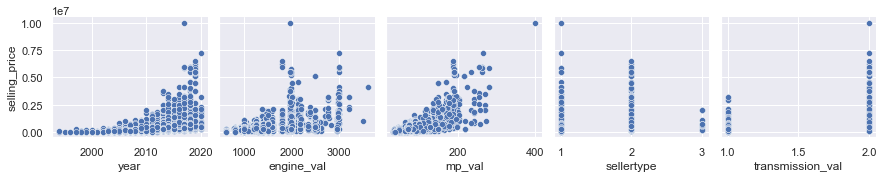

In [35]:
fig = plt.figure(figsize = (20, 25))

sns.pairplot(data=car,x_vars=['year', 'engine_val', 'mp_val', 'sellertype',
       'transmission_val'],y_vars=['selling_price'])

In [30]:
data.head()

,year,selling_price,km_driven,seats,Owner,fuel_val,sellertype,transmission_val,mileage_val,engine_val,mp_val
0,2014,450000,145500,5,1,1,1,1,23.40,1248,74.00
1,2014,370000,120000,5,2,1,1,1,21.14,1498,103.52
2,2006,158000,140000,5,3,2,1,1,17.70,1497,78.00
3,2010,225000,127000,5,1,1,1,1,23.00,1396,90.00
4,2007,130000,120000,5,1,2,1,1,16.10,1298,88.20


In [ ]:
significant_val=data.drop([''])

In [ ]:
sns.pairplot(data=data,hue='selling_price')

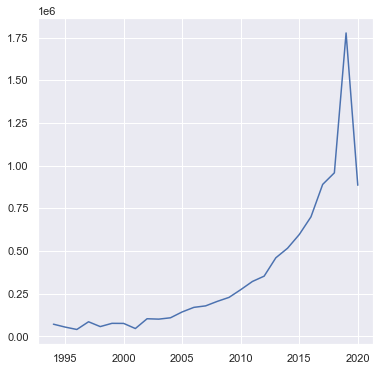

In [47]:
#Here we can see that as the direct relationship between selling price and the year of car
plt.figure(figsize = (6, 6))
year= data.groupby('year')['selling_price'].mean().round()
plt.plot(year)

<BarContainer object of 3 artists>

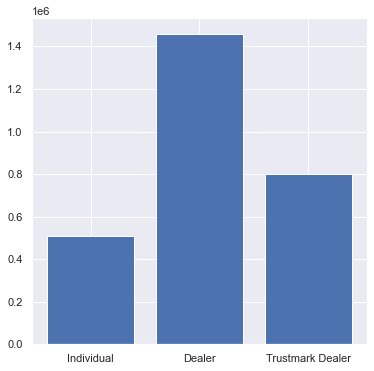

In [59]:
plt.figure(figsize = (6, 6))
xval= ['Individual', 'Dealer', 'Trustmark Dealer']
sellertype= data.groupby('sellertype')['selling_price'].mean().round()

sellertype
plt.bar(xval,sellertype)

<BarContainer object of 2 artists>

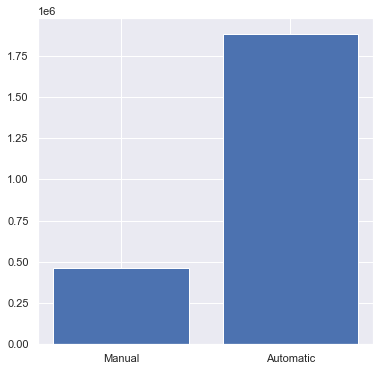

In [61]:

xval= ['Manual', 'Automatic']
transmission= data.groupby('transmission_val')['selling_price'].mean().round()

transmission
plt.figure(figsize=(6,6))
plt.bar(xval,transmission)

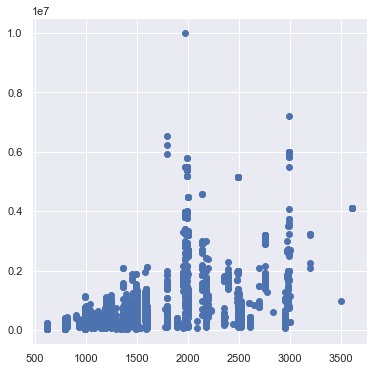

In [67]:
plt.figure(figsize = (6, 6))
plt.scatter(data['engine_val'],data['selling_price'])

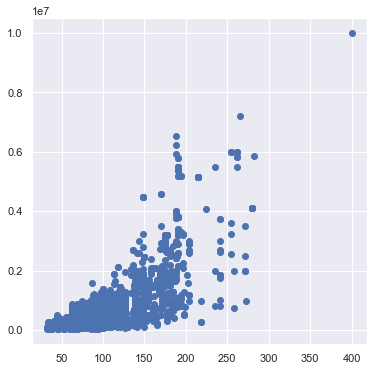

In [68]:
plt.figure(figsize = (6, 6))
plt.scatter(data['mp_val'],data['selling_price'])

# Question c

In [79]:
car['brand']= car['name'].apply(lambda x : x.split(' '))
car['brand']=car['brand'].apply(lambda x: x[0])
brand=car['brand'].unique()

In [84]:
#brand= data.groupby('brand')['selling_price'].count()
car['brand'].value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Opel                1
Ashok               1
Name: brand, dtype: int64

<BarContainer object of 31 artists>

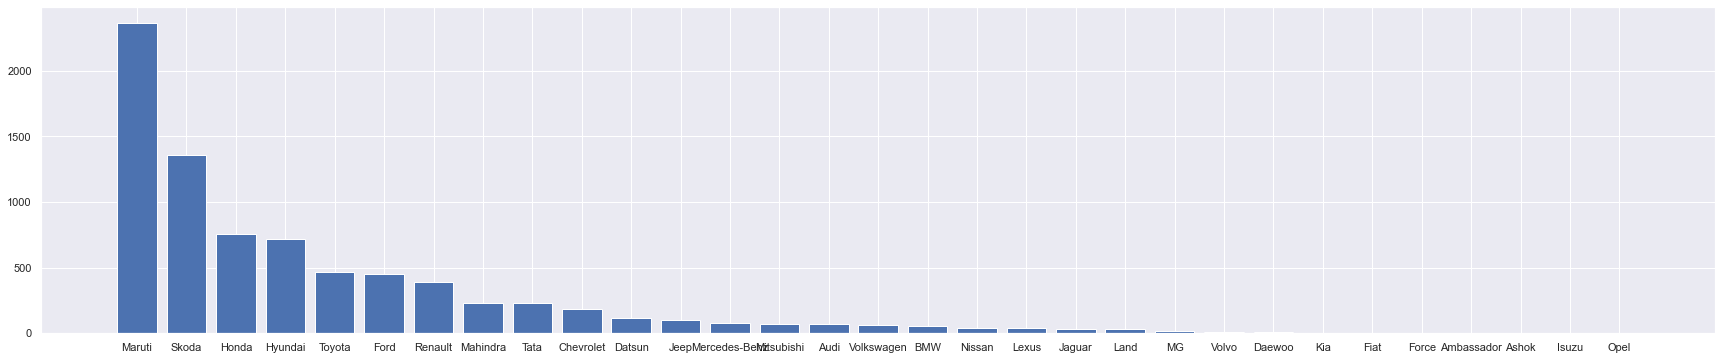

In [89]:
plt.figure(figsize = (30, 6))
plt.bar(brand,car['brand'].value_counts())

# Question d

In [92]:
car['State or Province'].value_counts()
locations=car['State or Province'].unique()
locations

array(['District of Columbia', 'New York', 'Illinois', 'California',
       'Texas', 'Massachusetts', 'Washington', 'Georgia',
       'North Carolina', 'Florida', 'Pennsylvania', 'Michigan', 'Iowa',
       'Oregon', 'New Mexico', 'Maryland', 'Montana', 'Arkansas',
       'Arizona', 'Maine', 'Vermont', 'New Jersey', 'Connecticut',
       'Oklahoma', 'Tennessee', 'Alabama', 'Wisconsin', 'South Carolina',
       'New Hampshire', 'Idaho', 'Minnesota', 'Ohio', 'Kansas', 'Utah',
       'Virginia', 'Nebraska', 'West Virginia', 'Colorado', 'Indiana',
       'Kentucky', 'Missouri', 'North Dakota', 'Rhode Island',
       'Louisiana', 'Wyoming', 'Nevada', 'Mississippi', 'Delaware',
       'South Dakota'], dtype=object)

<BarContainer object of 49 artists>

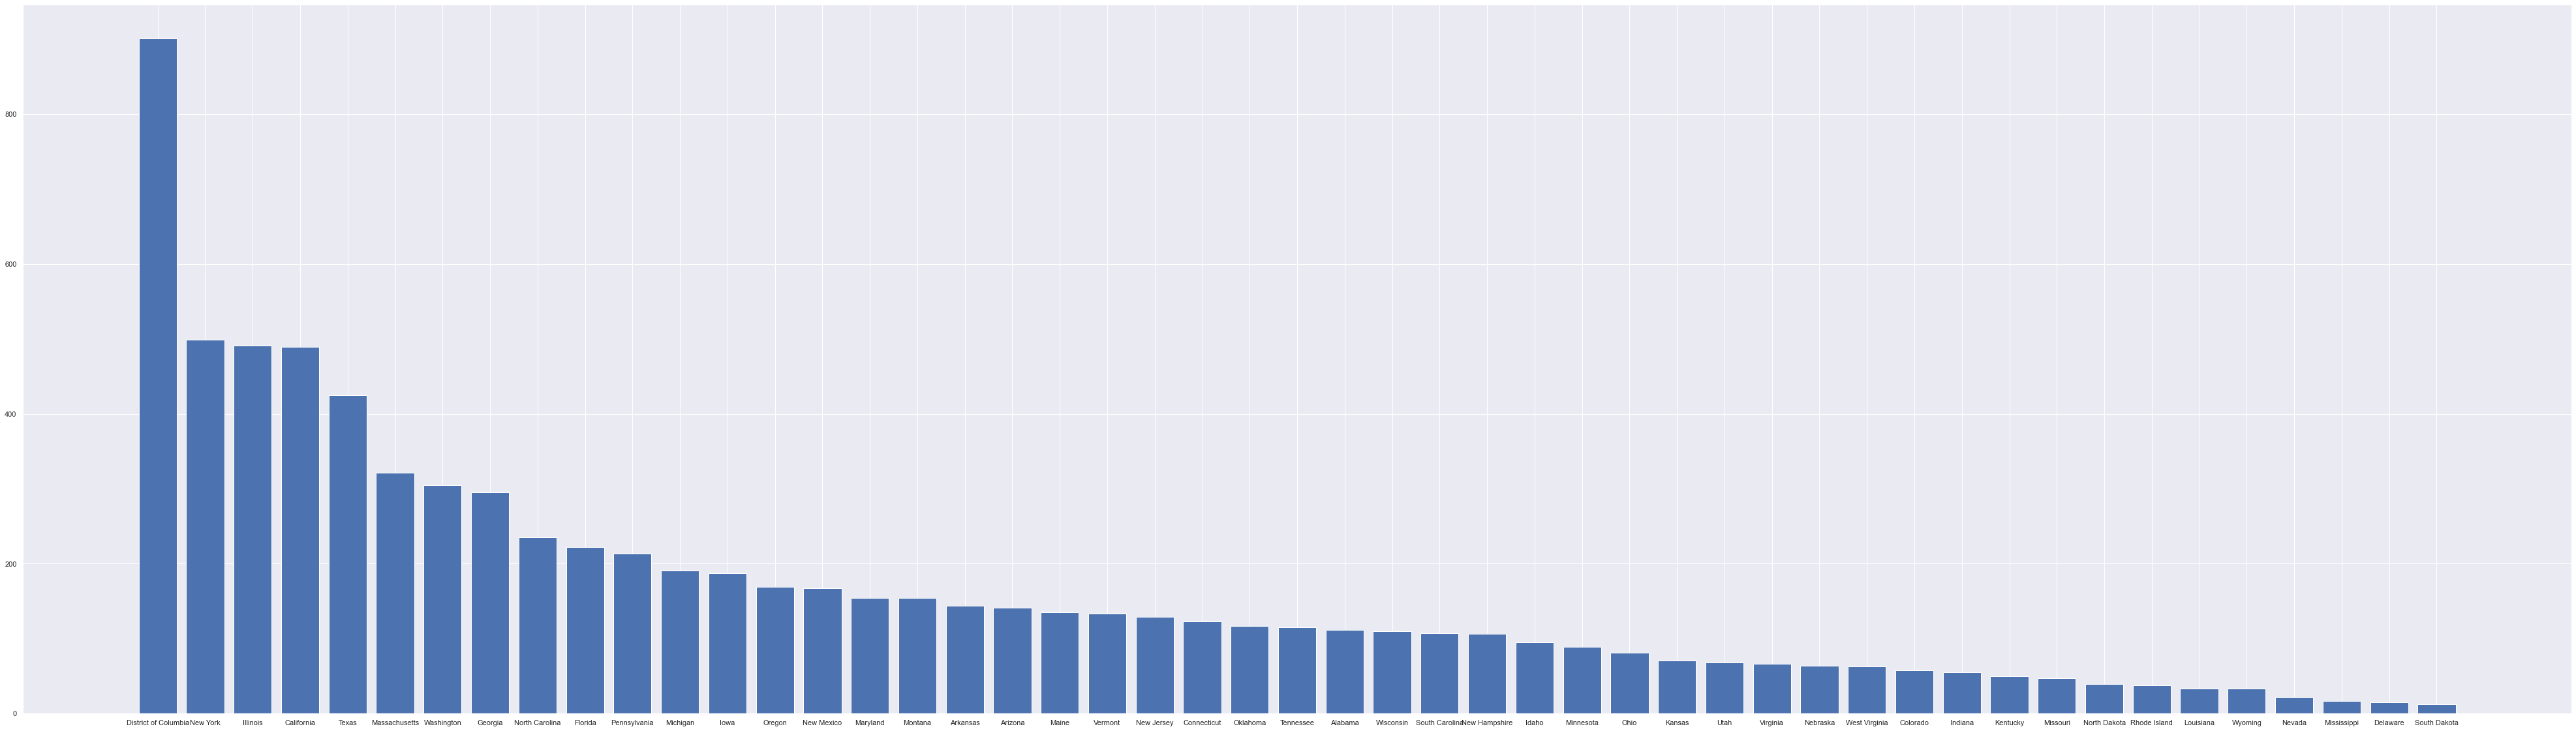

In [99]:
plt.figure(figsize = (70, 20))
plt.bar(locations,car['State or Province'].value_counts())

# Question e

In [104]:
xvar= ['year', 'km_driven', 'seats', 'Owner', 'fuel_val',
       'sellertype', 'transmission_val', 'mileage_val', 'engine_val',
       'mp_val']

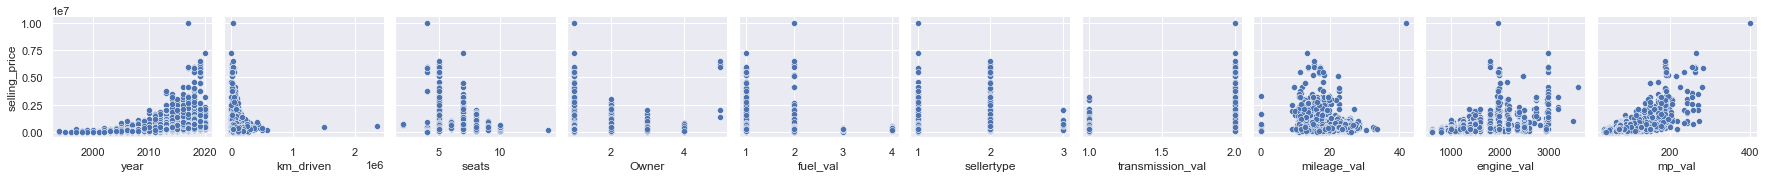

In [105]:
sns.pairplot(data=data,x_vars=xvar,y_vars=['selling_price'])